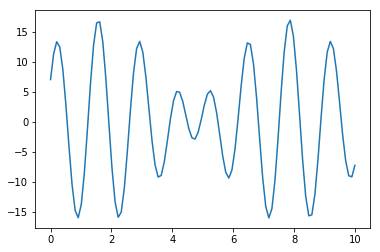

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np

plt.figure(1)

x=[]
y=[]

a=np.linspace(0,10,100)
for i in a:
    x.append(i)
    y.append(10 * math.sin(5 * i) + 7 * math.cos(4 * i))

plt.plot(x,y)

plt.show()

In [30]:
class R0_Fitting(object):
    def F1x(x):
        x = x/100
        y = -0.256823180051+0.047320313328*x-0.000001843795*x*x   #R0-1
        return y

    def F2x(x):
        x = x/100
        y = 0.004502717715+ 0.046713937559*x -0.000001349759*x*x   #R0-2
        return y

    def F3x(x):
        x = x/100
        y = 0.042974632079+0.046076796032*x   #R0-3
        return y
    
class R1_Fitting(object):
    def F1x(x):
        x = x/100
        y = 3.676787735817+0.409530191782*x+0.000241955388*x*x-0.000000325458*x*x*x    #R1-1
        return y

    def F2x(x):
        x = x/100
        y = -0.077441489721+0.470190420504*x  #R1-2
        return y

In [31]:
class CommFunc(object):
    def FuncData(self,fx):
        x=[]
        y=[]
        a = np.linspace(0,50000,500)
        for i in a:
            x.append(i)
            y.append(fx(i))
        return x,y

    def SubFx(self,f0,f1):
        x=[]
        y=[]
        a = np.linspace(0,50000,50000)
        for i in a:
            x.append(i)
            y.append(f1(i)-f0(i))
        return x,y

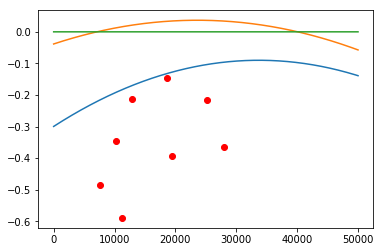

In [32]:

class R0_Run(object):
    
    def __init__(self,fit):
        self._f1 = fit.F1x
        self._f2 = fit.F2x
        self._f3 = fit.F3x
        self._cf = CommFunc()
    
    def R0_SubPoint(self,f0):
        x=[]
        y=[]
        a = [7642.5,10205.5,11211.1,18699,25184.8,12879,19497.8,28026.2]
        b = [3.079,4.4,4.619,8.512,11.431,5.765,8.635,12.593]
        for i in range(len(a)):
            ix = a[i]        
            x.append(ix)
            y.append(b[i]-f0(ix))
        return x,y
    
    def Run(self):
        x1,y1 = self._cf.SubFx(self._f3,self._f1)
        plt.plot(x1,y1)
        x1,y1 = self._cf.SubFx(self._f3,self._f2)
        plt.plot(x1,y1)
        x1,y1 = self._cf.SubFx(self._f3,self._f3)
        plt.plot(x1,y1)
        x1,y1 = self.R0_SubPoint(self._f3)
        plt.plot(x1,y1,'ro')
        plt.show()

a = R0_Run(R0_Fitting)
a.Run()

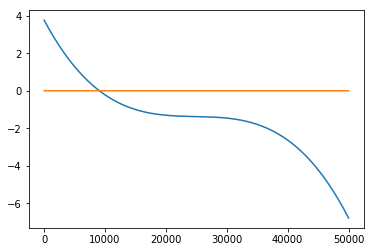

In [34]:
class R1_Run(object):
    
    def __init__(self,fit):
        self._f1 = fit.F1x
        self._f2 = fit.F2x
        self._cf = CommFunc()
    
    def Run(self):
        x1,y1 = self._cf.SubFx(self._f2,self._f1)
        plt.plot(x1,y1)
        x1,y1 = self._cf.SubFx(self._f2,self._f2)
        plt.plot(x1,y1)
        plt.show()

a = R1_Run(R1_Fitting)
a.Run()

In [40]:
def Rp(dmax,dmin):
    if(dmax<dmin):
        d = [dmax,dmin]
        dmax = d[1]
        dmin = d[0]
        
    subx = float(abs(dmax)-abs(dmin))
    m = -1
    if(subx<1):
        while(subx<1):
            m -= 1
            subx*=10
    else:
        while(subx>10):
            m+=1
            subx *= 0.1
    print(dmax,dmin,subx,m)
    rmin = int(dmin*pow(10,-m)-1.5) * pow(10,m)
    rmax = int(dmax*pow(10,-m)+1.5) * pow(10,m)
    print(rmin,rmax)

Rp(33264,32780)
Rp(33298,32081)

Rp(0.38231,0.32081)

33264 32780 4.840000000000001 1
32760 33270
33298 32081 1.2170000000000003 2
31900 33400
0.38231 0.32081 6.15 -3
0.319 0.383
